# Ejercicio 4 - guía 7

Llamamos 𝜃 a la proporción de vampiros que les gusta bailar tango. Supongamos que el prior
para 𝜃 es una distribución beta con media 0.6 y varianza 0.015.

## a) 
Determinar los hiperparámetros 𝛼 y 𝛽 del prior y graficar la prior.

### Desarrollo

En este caso nos están indicando la media y varianza del prior, podemos apoyarnos en la ecuación que describe a estas métricas en función
de los parámetros que nos interesan:

$$\text{E}(\theta) = \frac{\alpha}{\alpha+\beta}  = 0.6$$

$$\text{var}(\theta) = \frac{\alpha\beta}{(\alpha+\beta)^2(\alpha+\beta+1)} = 0.015$$

Tenemos que es un sistema de 2 ecuaciones con dos incógnitas, las cuales son los parámetros que nos interesan para trabajar con el prior.

Luego de hacer los despejes obtenemos que **alpha es igual a 9 y beta es igual a 6**. Con esto como dato, ahora paso a graficar el prior:

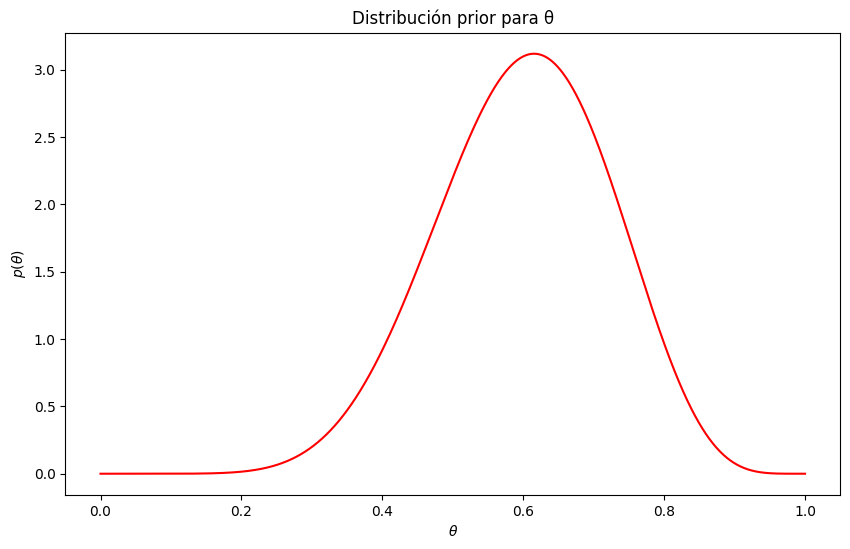

In [3]:
from scipy.stats import beta
import numpy as np
import matplotlib.pyplot as plt 

grilla_theta = np.linspace(0, 1, 1000)

plt.figure(figsize=(10, 6))
plt.plot(grilla_theta, beta.pdf(grilla_theta,9,6), color="red")
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta)$')
plt.title("Distribución prior para θ")
plt.show()

## b)
Se lleva a cabo una encuesta a 1000 vampiros y se obtiene que al 65% le gusta bailar tango.
¿Cuál es la media y el desvío estándar para 𝜃? Graficar la distribución posterior.

### Desarrollo

Para este caso es posible apoyarse en que la distribución beta es un prior conjugado de la distribución binomial (de la cual provienen nuestros datos), de este modo 
podemos obtener la distribución posterior exacta, la cual tiene la siguiente forma:

$$ p(\theta) \sim \text{Beta}(\alpha+y,\beta+n-y) $$

Paso a hacer el gráfico con esta información:

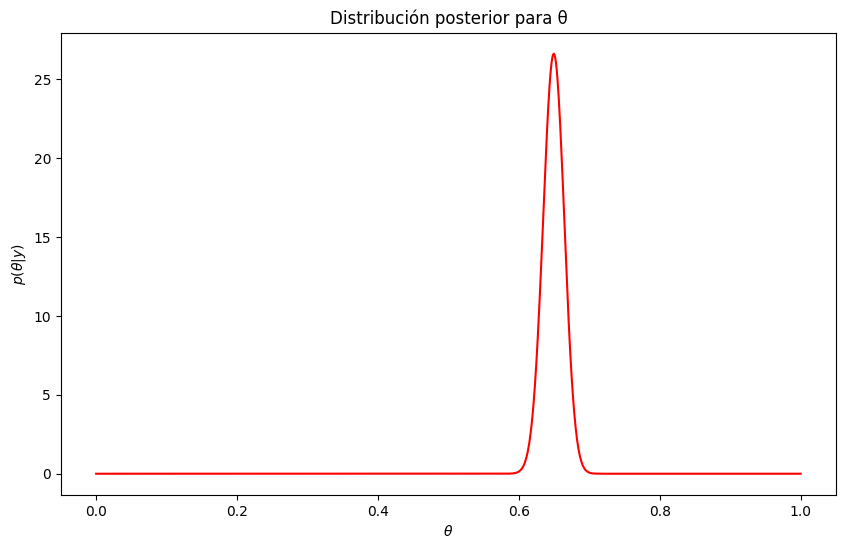

In [4]:
# Guardo los datos del inciso en variables
y = 650
n = 1000

plt.figure(figsize=(10, 6))
plt.plot(grilla_theta, beta.pdf(grilla_theta,9 + y, 6 + n - y), color="red")
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta|y)$')
plt.title("Distribución posterior para θ")
plt.show()

Finalmente la media y desvío estándar se pueden calcular como lo planteamos al principio cuando despejamos alpha y beta, planteo 
eso en el código para obtener los valores exactos:

In [6]:
esperanza_posterior = (9 + y) / (9 + y + 6 + n - y)
desvio_estandar_posterior = np.sqrt((9 + y)*(6 + n - y) / ((9 + y + 6 + n - y)**2 * (9 + y + 6 + n - y + 1)))

print(f'La media de la distribución posterior es: {esperanza_posterior}')
print(f'La desviación estándar de la distribución posterior es: {desvio_estandar_posterior}')

La media de la distribución posterior es: 0.6492610837438424
La desviación estándar de la distribución posterior es: 0.014971137878254227


## c)
Evaluar la sensibilidad de la distribución posterior respecto de distintas medias y varianzas
previas, incluyendo un prior uniforme.

### Desarrollo

Me armo una función para ver esta comparativa:

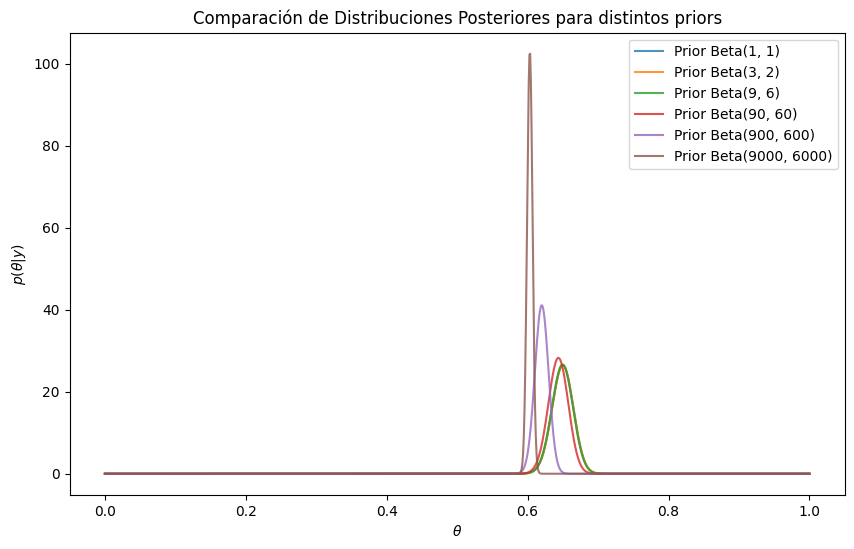

In [5]:
def comparacion_priors(priors, y, n):
    x = np.linspace(0, 1, 1000)
    plt.figure(figsize=(10, 6))

    for prior in priors:
        a, b = prior
        posterior = beta(a+y, b+n-y)
        plt.plot(x, posterior.pdf(x), label=f'Prior Beta({a}, {b})',alpha=0.8)

    plt.xlabel(r'$\theta$')
    plt.ylabel(r'$p(\theta|y)$')
    plt.title('Comparación de Distribuciones Posteriores para distintos priors')
    plt.legend()
    plt.show()


priors = [(1,1),(3,2),(9,6),(90,60),(900,600),(9000,6000)]
comparacion_priors(priors, y, n)

Podemos ver que en general, al tener una data tan fuerte (1000 intentos y 650 victorias), la posterior tiende a tener una media entre 0.6 y 0.7.